<a href="https://colab.research.google.com/github/vicex99/IA_aprendizaje_no_supervisado/blob/main/Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje No-Supervisado

Recordemos que el proposito del aprendizaje automatico superviado es predecir la realidad. El aprendizaje no supervisado tiene como proposito clasificar la realidad y generar predicciones sobre esta clasificacion. El aprendizaje no supervisado clasifica por similaridad.

La principal ventaja del aprendizaje no supervisado es que no se necesitan series de datos etiquetadas para proceder a la clasificacion.

La gran mayoria de modelos de aprendizaje no supervisado utilizan tecnicas de agrupacion por similaridad (distancia) entre parametros.

Vamos a necesitar los siguientes modulos:

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()
%matplotlib inline

Generamos un grupo de puntos utilizando la funcion make_blobs:

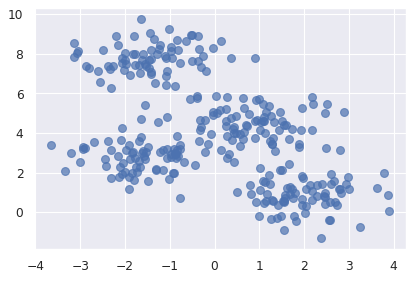

In [2]:
puntos, idx_grupos = make_blobs(n_samples=300,
                                centers=4,
                                cluster_std=0.8,
                                random_state=0)
 
x = puntos[:, 0]
y = puntos[:, 1]
 
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x, y, s=50, alpha=0.7);

Podemos ajustar estos puntos a un numero determinado de grupos:

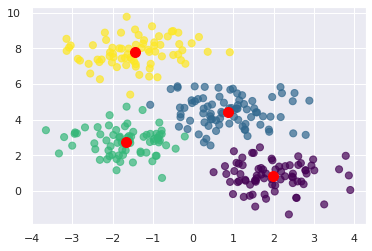

In [3]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
k_medias = KMeans(n_clusters=4, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Este es el procedimiento del algoritmo:

![picture](https://drive.google.com/uc?export=view&id=1-05xoK1X6jPUlA-lRg-E2mSP7STLM-Me)

¿Puedes probar a agrupar estos puntos en otro numero de grupos: 2, 3, 5 y 15 grupos?¿Que efecto tiene en la posicion de los centroides?¿Cual es el numero correcto de grupos?

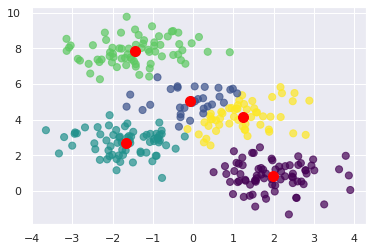

In [4]:
# prueba con 5
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);



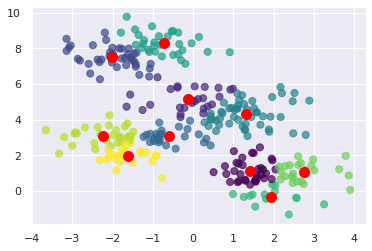

In [5]:
# prueba con 10
k_medias = KMeans(n_clusters=10, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);


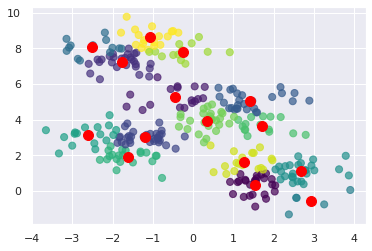

In [6]:
# prueba con 15
k_medias = KMeans(n_clusters=15, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Podemos utilizar un metodo menos visual para decidir el numero de grupos que nos ofrece la clasificacion mas efectiva:

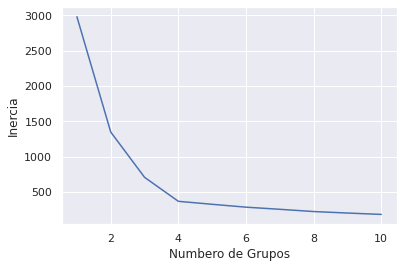

In [7]:
inercias = []
 
for i in range(1, 11):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)
 
plt.plot(range(1, 11), inercias)
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia');

Ya que el metodo visual no es muy mecanico, podemos encontrar la posicion del mejor valor en el codo mediante la doble derivacion:

In [8]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs

array([-1.20820979, -0.90310861, -0.91804932, -0.12904541, -0.14077872,
       -0.11760151, -0.14126267, -0.10352559, -0.10580101])

In [9]:
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif

array([ 0.30510118, -0.01494072,  0.78900391, -0.01173331,  0.02317721,
       -0.02366116,  0.03773707, -0.00227542])

In [10]:
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

4

# Segmentacion de clientes

Datos adaptados de: 
https://github.com/jeffprosise/Machine-Learning/blob/master/Data/customers.csv

Este tipo de tecnicas se pueden utilizar para segmentar, por ejemplo, los clientes de una empresa para poder ofrecerles el mejor servicio personalizado posible:

In [12]:
import pandas as pd

!wget https://raw.githubusercontent.com/vicex99/IA_aprendizaje_no_supervisado/main/data/customers.csv

--2022-12-01 19:07:49--  https://raw.githubusercontent.com/vicex99/IA_aprendizaje_no_supervisado/main/data/customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3745 (3.7K) [text/plain]
Saving to: ‘customers.csv’

customers.csv       100%[===================>]   3.66K  --.-KB/s    in 0s      

2022-12-01 19:07:49 (40.4 MB/s) - ‘customers.csv’ saved [3745/3745]



In [15]:
clientes = pd.read_csv("/content/customers.csv", index_col='ID')
clientes.head()

,Genero,Edad,Salario,Gasto
ID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Salario y Clasificacion de Gasto nos pueden indicar que clientes podrian estar interesados en aumentar su nivel de compras:

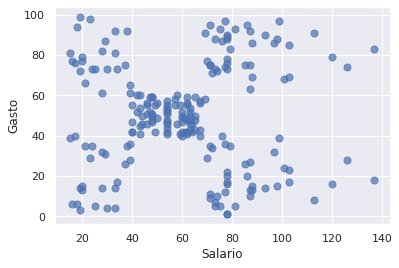

In [17]:
puntos = clientes[ ['Salario','Gasto'] ].values
x = puntos[:, 0]
y = puntos[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Salario')
plt.ylabel('Gasto');

¿En cuantos grupos podemos agruparlos? Visualmente parece que 5 grupos nos dan el menor numero de grupos que maximiza las diferencias entre los clientes de cada grupo.

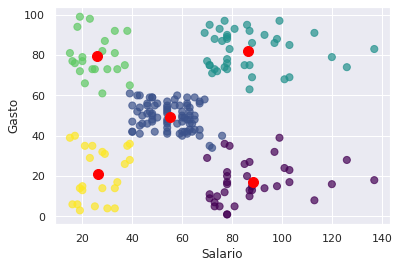

In [28]:
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Salario')
plt.ylabel('Gasto')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Hemos elegido 5 grupos por inspeccion visual del grafico. ¿Podrias demostrar que esta eleccion es correcta?

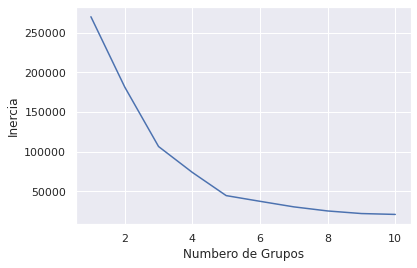

In [29]:
# El 5 es la eleccion correcta segun el analisis de la inercia por grupos.

inercias = []
 
for i in range(1, 11):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)
 
plt.plot(range(1, 11), inercias)
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia');

¿Cuales son los clientes con mayor salario y menor gasto? Podemos predecir en que grupo apareceria un cliente que tenga un salario de 120 y un gasto de 20:

In [39]:
objetivo = k_medias.predict(np.array([[90, 10]]))[0] # [90, 10]-> punto medio del grupo
objetivo

6

Los clientes de este grupo de interes se pueden extraer de la serie de datos completa:

In [40]:
# Grupo de poco gastadores con altos ingresos:
clientes['Grupo'] = k_medias.predict(clientes[['Salario','Gasto']].values)
# Filtrado solo para estos clientes:
clientes[ clientes['Grupo'] == objetivo]

,Genero,Edad,Salario,Gasto,Grupo
ID,,,,,
44,Female,31,39,61,6
46,Female,24,39,65,6
47,Female,50,40,55,6
48,Female,27,40,47,6
49,Female,29,40,42,6
50,Female,31,40,42,6
51,Female,49,42,52,6
52,Male,33,42,60,6
53,Female,31,43,54,6


Orientando nuestros esfuerzos de marketing y ventas hacia estos clientes quizas maximicemos nuestra eficacia. Otro modelo podria entonces clasificar los clientes por susceptibilidad a nuestras ofertas.

# Clasificacion Multivariable

La clasificacion no esta limitada a dos variables (bivariable), sino que puede ser multivariable. Para ello, debemos primero modificar el formato de nuestros datos para hacer todas las variables comprensibles por la maquina:

In [41]:
from sklearn.preprocessing import LabelEncoder
 
df = clientes.copy()
codificador = LabelEncoder()
df['Genero'] = codificador.fit_transform(df['Genero'])
df.head()

,Genero,Edad,Salario,Gasto,Grupo
ID,,,,,
1,1,19,15,39,1
2,1,21,15,81,4
3,0,20,16,6,7
4,0,23,16,77,4
5,0,31,17,40,1


Usaremos 3 variables inicialmente, es el limite de variables que podemos representar facilmente en el espacio tridimensional:

In [43]:
puntos = df[['Edad', 'Salario', 'Gasto']].values
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
df['Grupo'] = k_medias.predict(puntos)
df.Grupo

ID
1      0
2      4
3      0
4      4
5      0
      ..
196    1
197    3
198    1
199    3
200    1
Name: Grupo, Length: 200, dtype: int32

Generamos una visualizacion tridimensional:

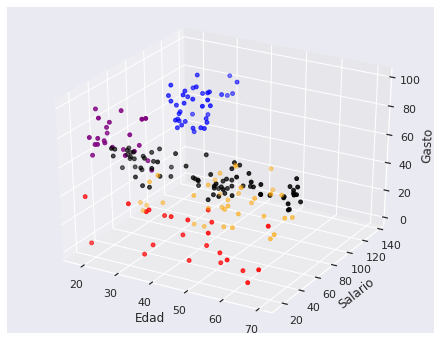

In [46]:
from mpl_toolkits.mplot3d import Axes3D
colors = ['red', 'blue', 'black', 'orange', 'purple']

df['color'] = df.Grupo.map({0:colors[0], 1:colors[1], 2:colors[2],
                        3:colors[3], 4:colors[4]})
fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Edad, df.Salario, df.Gasto, c=df.color, s=15)
ax.set_xlabel('Edad')
ax.set_ylabel('Salario')
ax.set_zlabel('Gasto')
plt.show()

¿Como son estos grupos? Inspeccionando sus valores medios ganamos algo mas de informacion:

In [48]:
resultados = pd.DataFrame(columns = ['Grupo',
                                     'Edad',
                                     'Ingresos Medios',
                                     'Gasto Medio'])
 
for i in range(len(k_medias.cluster_centers_)):
    edad = df[df['Grupo'] == i]['Edad'].mean()
    ingresos = df[df['Grupo'] == i]['Salario'].mean()
    gasto = df[df['Grupo'] == i]['Gasto'].mean()
 
    gdf = df[df['Grupo'] == i]
     
    resultados.loc[i] = ([i, edad, ingresos, gasto])
 
resultados.head()

,Grupo,Edad,Ingresos Medios,Gasto Medio
0,0.0,45.217391,26.304348,20.913043
1,1.0,32.692308,86.538462,82.128205
2,2.0,43.088608,55.291139,49.569620
3,3.0,40.666667,87.750000,17.583333
4,4.0,25.521739,26.304348,78.565217


In [49]:
k_medias.predict(np.array([[20, 20, 20]]))[0]

0

# Actividad:

Utilizando el archivo de datos sobre propiedas en EEUU, ¿Que tipo de grupos puedes generar mediante aprendizaje no supervisado?¿Que aplicaciones o utilidades podriamos extraer de estos datos?

Los datos son los siguientes: 



---


**'Avg. Area Income'**: Ingresos medios de los residentes en la localizacion.\
**'Avg. Area House Age'**: Antiguedad media de las casas en la ciudad.\
**'Avg. Area Number of Rooms'**: Media de habitaciones por casa en la zona.\
**'Avg. Area Number of Bedrooms'**: Media de dormitorios por casa en la zona.

---


**'Area Population'**: Poblacion de la zona en la que se localiza la casa.\
**'Price'**: Precio de la casa.

---


**'Address'**: Direccion postal de la casa.


In [ ]:
# Tu codigo aqui:

In [136]:
import pandas as pd

!wget https://raw.githubusercontent.com/vicex99/IA_aprendizaje_no_supervisado/main/data/usahousing.csv

--2022-12-01 22:16:19--  https://raw.githubusercontent.com/vicex99/IA_aprendizaje_no_supervisado/main/data/usahousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 696722 (680K) [text/plain]
Saving to: ‘usahousing.csv.2’

usahousing.csv.2    100%[===================>] 680.39K  --.-KB/s    in 0.02s   

2022-12-01 22:16:19 (41.1 MB/s) - ‘usahousing.csv.2’ saved [696722/696722]



Crear el dataframe local de propiedades

In [137]:
propiedades = pd.read_csv("/content/usahousing.csv", sep=';')
propiedades.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,7954545857431670,5682861321615580,7009188142792230,4.09,23086800502686400,10590335578701200,208 Michael Ferry Apt. 674 Laurabury NE 37010...
1,7924864245482560,60028998082752400,6730821019094910,3.09,4017307217364480,150589091484695,188 Johnson Views Suite 079 Lake Kathleen CA...
2,61287067178656700,5865889840310000,8512727430375090,5.13,3688215939970450,10589879878760800,9127 Elizabeth Stravenue Danieltown WI 06482...
3,6334524004622790,71882360945186400,5586728664827650,3.26,3431024283090700,12606168066294400,USS Barnett FPO AP 44820
4,59982197225708000,5040554523106280,7839387785120480,4.23,26354109472103100,6309434893385400,USNS Raymond FPO AE 09386


Comprobación de los valores unicos por cada campo de la tabla por los que vamos a poder analizar

In [138]:
# Tipos por numero habitaciones

prop_column = propiedades.columns

print("Income: " + str(len(propiedades[prop_column[0]].unique())))
print("House Age: " + str(len(propiedades[prop_column[1]].unique())))
print("Number of Rooms: " + str(len(propiedades[prop_column[2]].unique())))
print("Number of Bedrooms: " + str(len(propiedades[prop_column[3]].unique())))
print("Area Population: " + str(len(propiedades[prop_column[4]].unique())))
print("Price: " + str(len(propiedades[prop_column[5]].unique())))
print("Address: " + str(len(propiedades[prop_column[6]].unique())))


Income: 5000
House Age: 5000
Number of Rooms: 5000
Number of Bedrooms: 255
Area Population: 5000
Price: 5000
Address: 5000




---

Ejemplos de grupos que se pueden hacer.

Son ejemplos en dos dimensiones
- poblacion por precio
- 

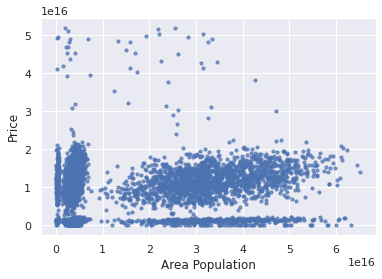

In [147]:
# Grupos por la poblacion y el precio

puntos_pob_price = propiedades[ ['Area Population','Price'] ].values
x = puntos_pob_price[:, 0]
y = puntos_pob_price[:, 1]
 
plt.scatter(x, y, s=10, alpha=0.7)
plt.xlabel('Area Population')
plt.ylabel('Price');

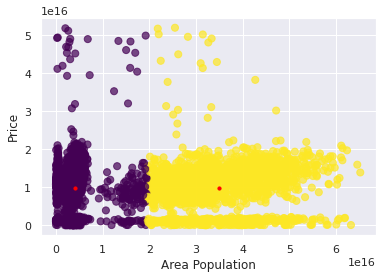

In [148]:
k_medias = KMeans(n_clusters=2, random_state=0)
k_medias.fit(puntos_pob_price)
idx_prediccion = k_medias.predict(puntos_pob_price)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Area Population')
plt.ylabel('Price')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=10);

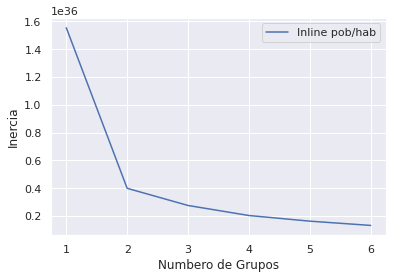

In [141]:
# El 5 es la eleccion correcta segun el analisis de la inercia por grupos.

inercias_pob_price = []
 
for i in range(1, 7):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos_pob_price)
  inercias_pob_price.append(k_medias.inertia_)
 
plt.plot(range(1, 7), inercias_pob_price, label='Inline pob/hab')
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia')
plt.legend()

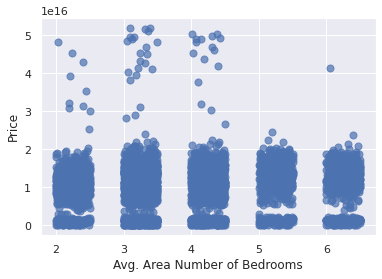

In [142]:
# Grupos por el numero de habitaciones y el precio

puntos_hab_price = propiedades[ ['Avg. Area Number of Bedrooms','Price'] ].values
x = puntos_hab_price[:, 0]
y = puntos_hab_price[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Avg. Area Number of Bedrooms')
plt.ylabel('Price');

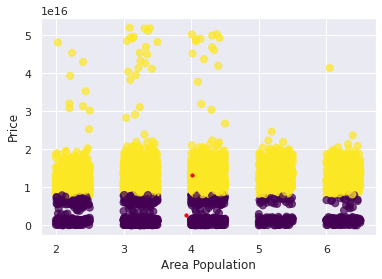

In [145]:
k_medias = KMeans(n_clusters=2, random_state=0)
k_medias.fit(puntos_hab_price)
idx_prediccion = k_medias.predict(puntos_hab_price)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Area Population')
plt.ylabel('Price')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=10);

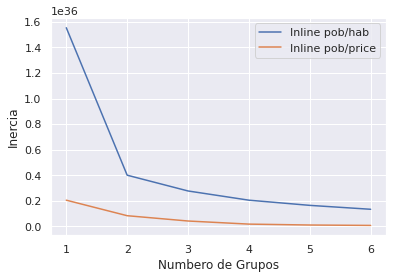

In [144]:
# El 5 es la eleccion correcta segun el analisis de la inercia por grupos.

inercias_pob_price = []
inercias_hab_price = []
 
for i in range(1, 7):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos_pob_price)
  inercias_pob_price.append(k_medias.inertia_)
  k_medias.fit(puntos_hab_price)
  inercias_hab_price.append(k_medias.inertia_)
 
plt.plot(range(1, 7), inercias_pob_price, label='Inline pob/hab')
plt.plot(range(1, 7), inercias_hab_price, label='Inline pob/price')
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia')
plt.legend()

Text(0, 0.5, 'Avg. Area Income')

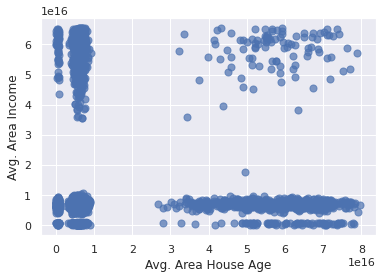

In [149]:
# Grupos por el numero de edad y el ganancia

puntos_age_income = propiedades[ ['Avg. Area House Age','Avg. Area Income'] ].values
x = puntos_age_income[:, 0]
y = puntos_age_income[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Avg. Area House Age')
plt.ylabel('Avg. Area Income')

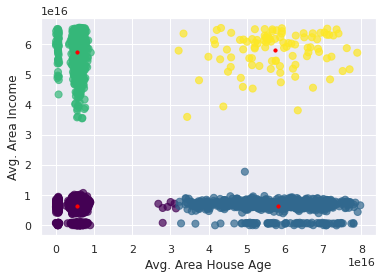

In [150]:
k_medias = KMeans(n_clusters=4, random_state=0)
k_medias.fit(puntos_age_income)
idx_prediccion = k_medias.predict(puntos_age_income)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Avg. Area House Age')
plt.ylabel('Avg. Area Income')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=10);

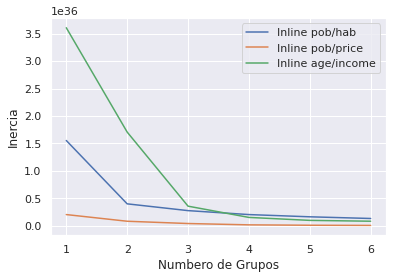

In [151]:
# El 5 es la eleccion correcta segun el analisis de la inercia por grupos.

inercias_pob_price = []
inercias_hab_price = []
inercias_age_income = []
 
for i in range(1, 7):
  k_medias = KMeans(n_clusters=i, random_state=0)

  k_medias.fit(puntos_pob_price)
  inercias_pob_price.append(k_medias.inertia_)

  k_medias.fit(puntos_hab_price)
  inercias_hab_price.append(k_medias.inertia_)
  
  k_medias.fit(puntos_age_income)
  inercias_age_income.append(k_medias.inertia_)


plt.plot(range(1, 7), inercias_pob_price, label='Inline pob/hab')
plt.plot(range(1, 7), inercias_hab_price, label='Inline pob/price')
plt.plot(range(1, 7), inercias_age_income, label='Inline age/income')
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia')
plt.legend()